In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = {
    'Square Footage': [1500, 2000, 2500, 1800, 2200, 1700, 2100, 1600, 2400, 2300],
    'Bedrooms': [3, 4, 4, 3, 5, 3, 4, 3, 4, 5],
    'Age': [10, 15, 5, 20, 10, 25, 15, 30, 5, 10],
    'Price': [300000, 400000, 500000, 350000, 450000, 320000, 410000, 315000, 480000, 465000]
}
df = pd.DataFrame(data)

In [ ]:
X = df[['Square Footage', 'Bedrooms', 'Age']]
y = df['Price']

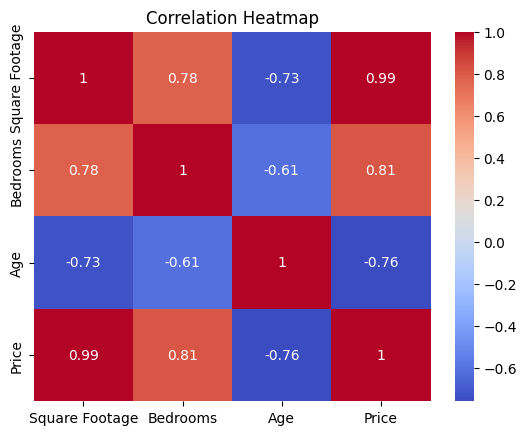

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

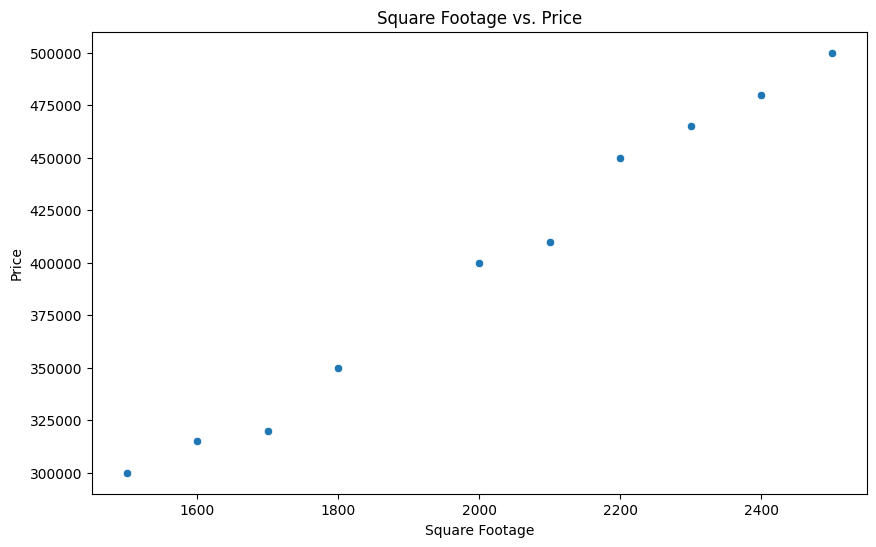

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Square Footage', y='Price', data=df)
plt.title('Square Footage vs. Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept (b0):", model.intercept_)
print("Coefficients for squarefootage:", model.coef_[0])

Intercept (b0): -368.0574010100099
Coefficients for squarefootage: 184.87244220037212


In [ ]:
# Predicting prices using the test set
y_pred = model.predict(X_test)

# Displaying the predictions
print("Predicted Prices:", y_pred)

Predicted Prices: [477876.02976349 398363.67260165]


In [ ]:
# Displaying actual vs estimated values
results = pd.DataFrame({'Actual': y_test, 'Estimated': y_pred})
print(results)

   Actual      Estimated
8  480000  477876.029763
1  400000  398363.672602


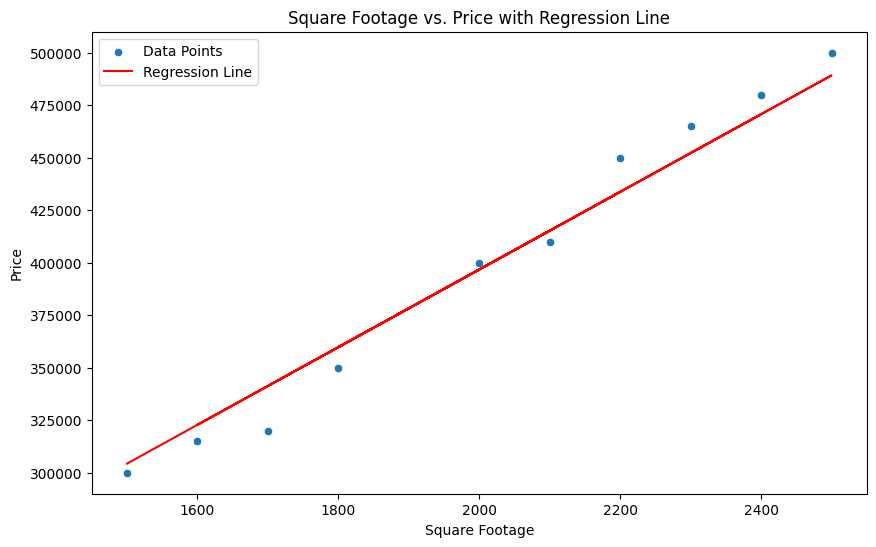

In [ ]:
# Plotting Square Footage vs Price with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Square Footage', y='Price', data=df, label='Data Points')
plt.plot(df['Square Footage'], model.intercept_ + model.coef_[0] * df['Square Footage']
         + model.coef_[1] * df['Bedrooms'].mean() + model.coef_[2] * df['Age'].mean(),
         color='red', label='Regression Line')
plt.title('Square Footage vs. Price with Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()